In [79]:
import numpy as np
import pandas as pd
import pymongo
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.dates as md
import matplotlib.patches as mpatches # custom legend
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=['Microsoft YaHei'])

In [80]:
conn = pymongo.MongoClient("localhost", 27017)
db = conn.Txdb
myset = db.txinfo

In [81]:
result = myset.find()
df = pd.DataFrame(i for i in result).drop(columns="_id")

In [82]:
df.head()

,契約,到期月份(週別),開盤價,最高價,最低價,最後成交價,漲跌價,漲跌%,*盤後交易時段成交量,*一般交易時段成交量,*合計成交量,結算價,*未沖銷契約量,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,交易日期
0,TX,202001,12091,12125,12065,12069,▼-28,▼-0.23%,18175,66062,84237,12069,88167,12069,12070,12125,11070,2019/12/30
1,TX,202002,12074,12111,12056,12059,▼-26,▼-0.22%,328,1056,1384,12058,2156,12057,12059,12111,11383,2019/12/30
2,TX,202003,12058,12092,12038,12041,▼-26,▼-0.22%,30,120,150,12041,2363,12039,12042,12092,9756,2019/12/30
3,TX,202006,12000,12036,11990,11990,▼-24,▼-0.20%,3,35,38,11990,780,11988,11993,12036,9919,2019/12/30
4,TX,202009,11647,11660,11621,11622,▼-23,▼-0.20%,16,42,58,11622,572,11619,11624,11660,10270,2019/12/30


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   契約          126 non-null    object
 1   到期月份(週別)    126 non-null    object
 2   開盤價         126 non-null    object
 3   最高價         126 non-null    object
 4   最低價         126 non-null    object
 5   最後成交價       126 non-null    object
 6   漲跌價         126 non-null    object
 7   漲跌%         126 non-null    object
 8   *盤後交易時段成交量  126 non-null    object
 9   *一般交易時段成交量  126 non-null    object
 10  *合計成交量      126 non-null    object
 11  結算價         126 non-null    object
 12  *未沖銷契約量     126 non-null    object
 13  最後最佳買價      126 non-null    object
 14  最後最佳賣價      126 non-null    object
 15  歷史最高價       126 non-null    object
 16  歷史最低價       126 non-null    object
 17  交易日期        126 non-null    object
dtypes: object(18)
memory usage: 17.8+ KB


In [84]:
#特殊符號處理 ud ud%
df["漲跌價"] = [re.findall(r"[-]\d+", i)[0] if "-" in i else re.findall(r"\d+", i)[0] for i in df["漲跌價"]]

In [85]:
df["漲跌%"] = [re.findall(r"[-]\d+.\d+\w+", i)[0] if "-" in i else re.findall(r"\d+.\d+\w+", i)[0] for i in df["漲跌%"]]

In [86]:
df.head(10)

,契約,到期月份(週別),開盤價,最高價,最低價,最後成交價,漲跌價,漲跌%,*盤後交易時段成交量,*一般交易時段成交量,*合計成交量,結算價,*未沖銷契約量,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,交易日期
0,TX,202001,12091,12125,12065,12069,-28,-0.23,18175,66062,84237,12069,88167,12069,12070,12125,11070,2019/12/30
1,TX,202002,12074,12111,12056,12059,-26,-0.22,328,1056,1384,12058,2156,12057,12059,12111,11383,2019/12/30
2,TX,202003,12058,12092,12038,12041,-26,-0.22,30,120,150,12041,2363,12039,12042,12092,9756,2019/12/30
3,TX,202006,12000,12036,11990,11990,-24,-0.20,3,35,38,11990,780,11988,11993,12036,9919,2019/12/30
4,TX,202009,11647,11660,11621,11622,-23,-0.20,16,42,58,11622,572,11619,11624,11660,10270,2019/12/30
5,TX,202012,11590,11611,11572,11572,-23,-0.20,4,15,19,11572,136,11568,11574,11611,11462,2019/12/30
6,TX,202001,12038,12112,12037,12097,90,0.75,11513,74454,85967,12097,88703,12097,12098,12118,11070,2019/12/27
7,TX,202002,12022,12098,12022,12085,90,0.75,127,1200,1327,12085,1962,12083,12086,12103,11383,2019/12/27
8,TX,202003,12014,12080,12014,12067,91,0.76,8,153,161,12067,2326,12065,12069,12082,9756,2019/12/27
9,TX,202006,11954,12026,11954,12014,85,0.71,2,40,42,12014,776,12014,12016,12026,9919,2019/12/27


In [87]:
# 結算價 
df["結算價"].unique()

array(['12069', '12058', '12041', '11990', '11622', '11572', '12097',
       '12085', '12067', '12014', '11645', '11595', '12007', '11995',
       '11976', '11929', '11558', '11509', '12019', '12006', '11942',
       '11569', '11525', '11983', '11973', '11956', '11903', '11534',
       '11484', '12020', '11984', '11936', '11566', '11515', '11979',
       '11966', '11950', '11890', '11522', '11470', '12031', '12017',
       '12002', '11943', '11571', '11524', '-', '12096', '12077', '12060',
       '12000', '11628', '12099', '12091', '12073', '12056', '11994',
       '11620', '11959', '11946', '11931', '11911', '11852', '11483',
       '11963', '11941', '11926', '11910', '11850', '11487', '11851',
       '11828', '11813', '11794', '11730', '11368', '11704', '11676',
       '11662', '11642', '11579', '11211', '11624', '11600', '11586',
       '11565', '11498', '11131', '11671', '11632', '11606', '11538',
       '11175', '11611', '11584', '11567', '11545', '11475', '11109',
       '11598',

In [88]:
df.loc[df["結算價"] =='-', "交易日期"]

48    2019/12/18
Name: 交易日期, dtype: object

In [89]:
sum_p_mean = int(pd.Series([int(x) for x in df['結算價'] if x != '-']).mean())
df["結算價"] = [sum_p_mean  if i == '-' else i for i in df["結算價"]]
df["結算價"].unique()

array(['12069', '12058', '12041', '11990', '11622', '11572', '12097',
       '12085', '12067', '12014', '11645', '11595', '12007', '11995',
       '11976', '11929', '11558', '11509', '12019', '12006', '11942',
       '11569', '11525', '11983', '11973', '11956', '11903', '11534',
       '11484', '12020', '11984', '11936', '11566', '11515', '11979',
       '11966', '11950', '11890', '11522', '11470', '12031', '12017',
       '12002', '11943', '11571', '11524', 11705, '12096', '12077',
       '12060', '12000', '11628', '12099', '12091', '12073', '12056',
       '11994', '11620', '11959', '11946', '11931', '11911', '11852',
       '11483', '11963', '11941', '11926', '11910', '11850', '11487',
       '11851', '11828', '11813', '11794', '11730', '11368', '11704',
       '11676', '11662', '11642', '11579', '11211', '11624', '11600',
       '11586', '11565', '11498', '11131', '11671', '11632', '11606',
       '11538', '11175', '11611', '11584', '11567', '11545', '11475',
       '11109', '11598

In [90]:
#日期 轉成datetime
df["交易日期"] = pd.to_datetime(df["交易日期"], format="%Y-%m-%d")
df.head(10)

,契約,到期月份(週別),開盤價,最高價,最低價,最後成交價,漲跌價,漲跌%,*盤後交易時段成交量,*一般交易時段成交量,*合計成交量,結算價,*未沖銷契約量,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,交易日期
0,TX,202001,12091,12125,12065,12069,-28,-0.23,18175,66062,84237,12069,88167,12069,12070,12125,11070,2019-12-30
1,TX,202002,12074,12111,12056,12059,-26,-0.22,328,1056,1384,12058,2156,12057,12059,12111,11383,2019-12-30
2,TX,202003,12058,12092,12038,12041,-26,-0.22,30,120,150,12041,2363,12039,12042,12092,9756,2019-12-30
3,TX,202006,12000,12036,11990,11990,-24,-0.20,3,35,38,11990,780,11988,11993,12036,9919,2019-12-30
4,TX,202009,11647,11660,11621,11622,-23,-0.20,16,42,58,11622,572,11619,11624,11660,10270,2019-12-30
5,TX,202012,11590,11611,11572,11572,-23,-0.20,4,15,19,11572,136,11568,11574,11611,11462,2019-12-30
6,TX,202001,12038,12112,12037,12097,90,0.75,11513,74454,85967,12097,88703,12097,12098,12118,11070,2019-12-27
7,TX,202002,12022,12098,12022,12085,90,0.75,127,1200,1327,12085,1962,12083,12086,12103,11383,2019-12-27
8,TX,202003,12014,12080,12014,12067,91,0.76,8,153,161,12067,2326,12065,12069,12082,9756,2019-12-27
9,TX,202006,11954,12026,11954,12014,85,0.71,2,40,42,12014,776,12014,12016,12026,9919,2019-12-27


In [91]:
#轉型 (到期月份(週別) 交易日期 契約 不轉， 漲跌% 轉 float)
xlist = ["到期月份(週別)", "交易日期", "契約"]
for i in df.columns:
    if i in xlist:
        continue
    elif i == '漲跌%':
        df[i] = df[i].astype("float")
    else:
        df[i] = df[i].astype("int")

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   契約          126 non-null    object        
 1   到期月份(週別)    126 non-null    object        
 2   開盤價         126 non-null    int32         
 3   最高價         126 non-null    int32         
 4   最低價         126 non-null    int32         
 5   最後成交價       126 non-null    int32         
 6   漲跌價         126 non-null    int32         
 7   漲跌%         126 non-null    float64       
 8   *盤後交易時段成交量  126 non-null    int32         
 9   *一般交易時段成交量  126 non-null    int32         
 10  *合計成交量      126 non-null    int32         
 11  結算價         126 non-null    int32         
 12  *未沖銷契約量     126 non-null    int32         
 13  最後最佳買價      126 non-null    int32         
 14  最後最佳賣價      126 non-null    int32         
 15  歷史最高價       126 non-null    int32         
 16  歷史最低價       126 non-null  

In [93]:
df.head()

,契約,到期月份(週別),開盤價,最高價,最低價,最後成交價,漲跌價,漲跌%,*盤後交易時段成交量,*一般交易時段成交量,*合計成交量,結算價,*未沖銷契約量,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,交易日期
0,TX,202001,12091,12125,12065,12069,-28,-0.23,18175,66062,84237,12069,88167,12069,12070,12125,11070,2019-12-30
1,TX,202002,12074,12111,12056,12059,-26,-0.22,328,1056,1384,12058,2156,12057,12059,12111,11383,2019-12-30
2,TX,202003,12058,12092,12038,12041,-26,-0.22,30,120,150,12041,2363,12039,12042,12092,9756,2019-12-30
3,TX,202006,12000,12036,11990,11990,-24,-0.20,3,35,38,11990,780,11988,11993,12036,9919,2019-12-30
4,TX,202009,11647,11660,11621,11622,-23,-0.20,16,42,58,11622,572,11619,11624,11660,10270,2019-12-30


In [94]:
high = df.groupby(["交易日期","到期月份(週別)"]).agg({"最高價":["max"]})
high.head(15)

最高價
                       max
交易日期       到期月份(週別)       
2019-12-02 201912    11533
           202001    11502
           202002    11484
           202003    11459
           202006    11395
           202009    11032
2019-12-03 201912    11527
           202001    11496
           202002    11478
           202003    11457
           202006    11388
           202009    11025
2019-12-04 201912    11505
           202001    11475
           202002    11457

In [95]:
df_end01 = df.loc[df["到期月份(週別)"]=="202001"]
df_end01.head()

,契約,到期月份(週別),開盤價,最高價,最低價,最後成交價,漲跌價,漲跌%,*盤後交易時段成交量,*一般交易時段成交量,*合計成交量,結算價,*未沖銷契約量,最後最佳買價,最後最佳賣價,歷史最高價,歷史最低價,交易日期
0,TX,202001,12091,12125,12065,12069,-28,-0.23,18175,66062,84237,12069,88167,12069,12070,12125,11070,2019-12-30
6,TX,202001,12038,12112,12037,12097,90,0.75,11513,74454,85967,12097,88703,12097,12098,12118,11070,2019-12-27
12,TX,202001,12029,12042,11986,12009,-10,-0.08,3910,52249,56159,12007,85853,12008,12009,12118,11070,2019-12-26
18,TX,202001,11989,12027,11976,12020,37,0.31,14013,41599,55612,12019,84522,12019,12021,12118,11070,2019-12-25
24,TX,202001,12030,12044,11982,11983,-37,-0.31,14763,55384,70147,11983,83808,11982,11984,12118,11070,2019-12-24


In [96]:
df["到期月份(週別)"].unique()

array(['202001', '202002', '202003', '202006', '202009', '202012',
       '201912'], dtype=object)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   契約          126 non-null    object        
 1   到期月份(週別)    126 non-null    object        
 2   開盤價         126 non-null    int32         
 3   最高價         126 non-null    int32         
 4   最低價         126 non-null    int32         
 5   最後成交價       126 non-null    int32         
 6   漲跌價         126 non-null    int32         
 7   漲跌%         126 non-null    float64       
 8   *盤後交易時段成交量  126 non-null    int32         
 9   *一般交易時段成交量  126 non-null    int32         
 10  *合計成交量      126 non-null    int32         
 11  結算價         126 non-null    int32         
 12  *未沖銷契約量     126 non-null    int32         
 13  最後最佳買價      126 non-null    int32         
 14  最後最佳賣價      126 non-null    int32         
 15  歷史最高價       126 non-null    int32         
 16  歷史最低價       126 non-null  

In [103]:
def adjustDate():
    global df_end01
    plt.xlim(list(df_end01["交易日期"])[-1] - pd.Timedelta(hours=10),list(df_end01["交易日期"])[0] + pd.Timedelta(hours=10))
    
    plt.xticks(pd.date_range('2019-12-02','2019-12-30',freq='1d'))
    plt.gca().xaxis.set_major_locator(md.DayLocator()) # 設定每日為主要刻度
    plt.gca().xaxis.set_major_formatter(md.DateFormatter('%m-%d'))
    plt.gcf().autofmt_xdate()# 自動調整刻度 
    plt.setp(plt.xticks()[1],ha="center")

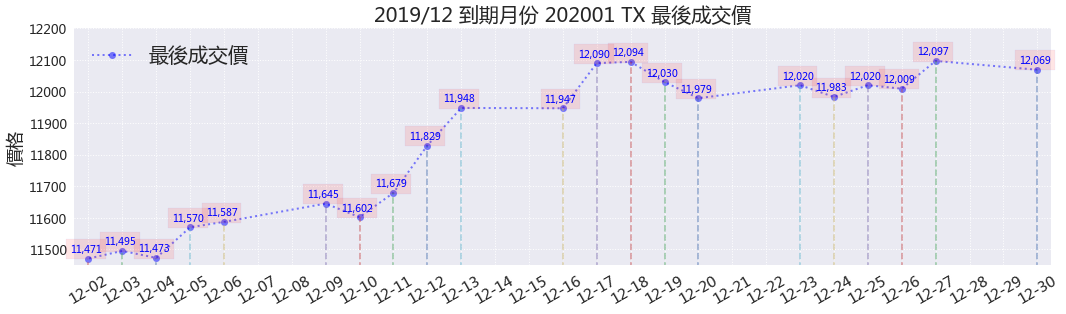

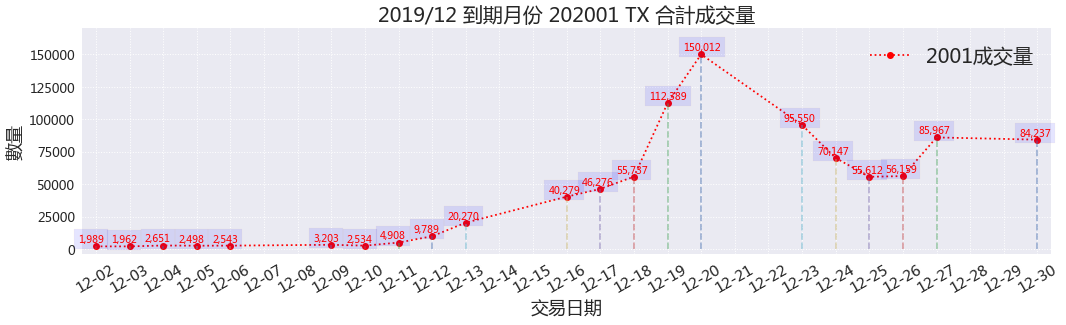

In [115]:
plt.figure(figsize=(15,8))
plt.subplot(211)
plt.plot(df_end01["交易日期"],df_end01["最後成交價"], "o:", c="blue", label="最後成交價", linewidth=2,alpha=0.5)

plt.title("2019/12 到期月份 202001 TX 最後成交價", fontsize=20)
plt.ylabel("價格", fontsize=18)

bboxTuple = (dict(edgecolor="blue",facecolor="red",alpha=0.1),
            dict(edgecolor="orange",facecolor="blue",alpha=0.1))

for x, y in zip(df_end01["交易日期"], df_end01["最後成交價"]):
    xPossition = x - pd.Timedelta(hours=13)
    plt.text(xPossition,y+20,format(y,","),fontsize=10,bbox=bboxTuple[0],color="blue")
    plt.plot([x,x],[0,y],linestyle='--',alpha=0.5)

adjustDate()
plt.ylim(11450,12200)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=13)
plt.tight_layout()
plt.grid(linestyle=":")
plt.legend(prop={'size':20})
plt.show()

plt.figure(figsize=(15,8))
plt.subplot(212)
df_end01 = df.loc[df["到期月份(週別)"] == "202001"]
plt.plot(df_end01["交易日期"],df_end01["*合計成交量"],"o:", c="r", label="2001成交量")
plt.title("2019/12 到期月份 202001 TX 合計成交量", fontsize=20)
plt.xlabel("交易日期", fontsize=18)
plt.ylabel("數量", fontsize=18)

for x, y in zip(df_end01["交易日期"],df_end01["*合計成交量"]):
    xPossition = x - pd.Timedelta(hours=13)
    plt.text(xPossition, y+3000, format(y,','),fontsize=10,bbox=bboxTuple[1],color="red")
    plt.plot([x,x],[0,y],linestyle="--",alpha=0.5)
    
adjustDate()
plt.ylim(-4000,170000)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=13)
plt.tight_layout()
plt.grid(linestyle=":")
plt.legend(prop={'size':20})
plt.show()

2020年12月的成交量圖，發現成交量、交易量高低隨著價格波動。12/10到12/18趨勢是上升，交易量隨著價格持續上漲，直到12/19開始下降，12/20星期五交易量來到最高點，猜測周末不開市，預期下禮拜也會有降低的趨勢導致此狀況產生

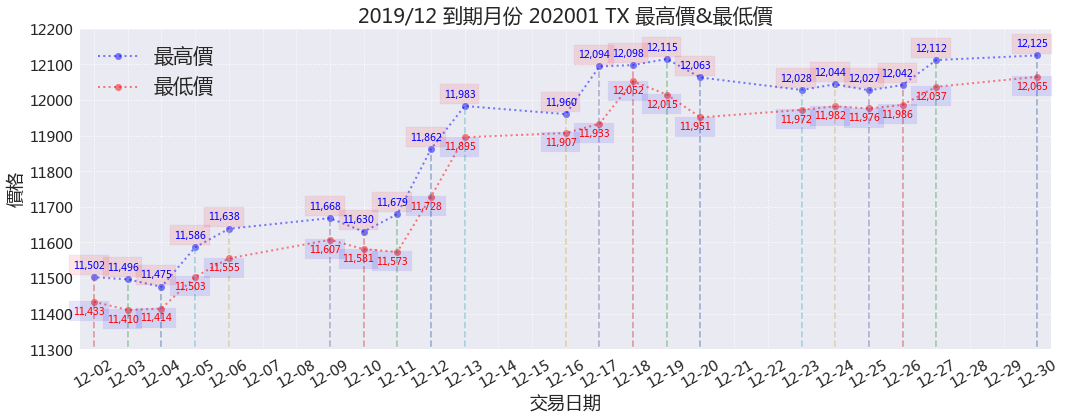

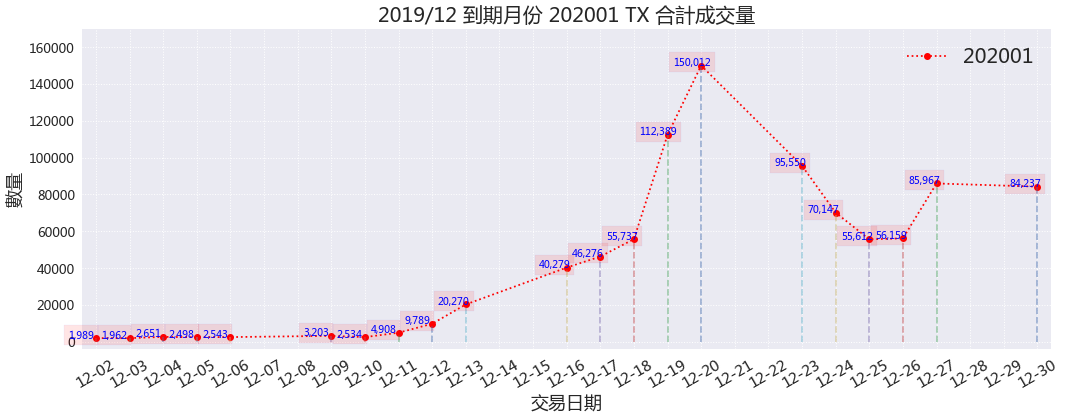

In [152]:
plt.figure(figsize=(15,6))
plt.plot(df_end01["交易日期"],df_end01["最高價"], "o:", c="blue", label="最高價", linewidth=2, alpha=0.5)
plt.plot(df_end01["交易日期"],df_end01["最低價"], "o:", c="red", label="最低價", linewidth=2, alpha=0.5)

plt.title("2019/12 到期月份 202001 TX 最高價&最低價", fontsize=20)
plt.xlabel("交易日期", fontsize=18)
plt.ylabel("價格", fontsize=18)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

bboxTuple = (dict(edgecolor='blue', facecolor='red',alpha=0.1),
             dict(edgecolor='orange',facecolor='blue',alpha=0.1))

for x, y, z in zip(df_end01["交易日期"], df_end01["最高價"],df_end01["最低價"]):
    xPossition = x - pd.Timedelta(hours=15)
    plt.text(xPossition, y+25, format(y,","),fontsize=10, bbox=bboxTuple[0], color='blue')
    plt.text(xPossition, z-35, format(z,","),fontsize=10, bbox=bboxTuple[1], color='red')
    plt.plot([x,x],[0,y],linestyle="--",alpha=0.5)

adjustDate()
plt.ylim(11300,12200)
plt.tight_layout()
plt.grid(linestyle=":")
plt.legend(prop={'size':20})
plt.show()


plt.figure(figsize=(15,6))
df_end01 = df.loc[df["到期月份(週別)"] == "202001"]

plt.plot(df_end01["交易日期"],df_end01["*合計成交量"],"o:", c="r", label="202001")
plt.title("2019/12 到期月份 202001 TX 合計成交量", fontsize=20)
plt.xlabel("交易日期", fontsize=18)
plt.ylabel("數量", fontsize=18)

for x, y in zip(df_end01["交易日期"], df_end01["*合計成交量"]):
    xPossition = x - pd.Timedelta(hours=20)
    plt.text(xPossition, y+30, format(y,","),fontsize=10, bbox=bboxTuple[0], color='blue')
    plt.plot([x,x],[0,y],linestyle="--",alpha=0.5)
    

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=13)
adjustDate()
plt.ylim(-4000,170000)
plt.tight_layout()
plt.grid(linestyle=":")
plt.legend(prop={'size':20})
plt.show()

發現成交量、交易量高低隨著價格波動。12/10到12/18趨勢是上升，交易量隨著價格持續上漲，直到12/19開始下降，12/20星期五交易量來到最高點，猜測周末不開市，預期下禮拜也會有降低的趨勢導致此狀況產生

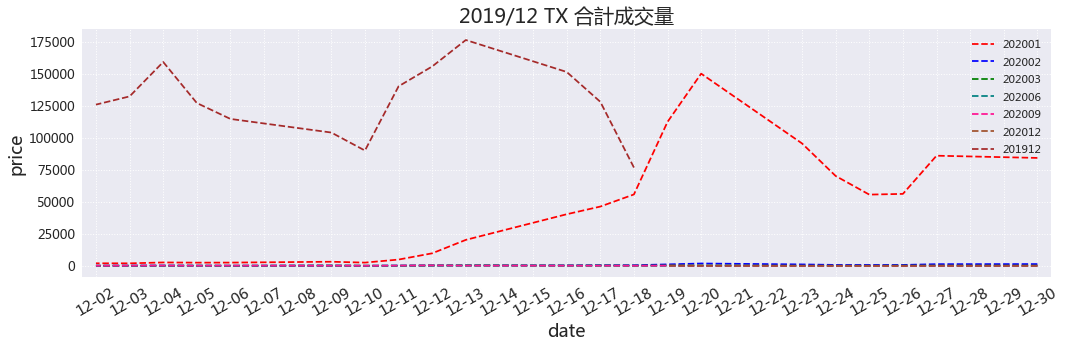

In [150]:
plt.figure(figsize=(15,5))

df_end01 = df.loc[df["到期月份(週別)"] == "202001"]
df_end02 = df.loc[df["到期月份(週別)"] == "202002"]
df_end03 = df.loc[df["到期月份(週別)"] == "202003"]
df_end06 = df.loc[df["到期月份(週別)"] == "202006"]
df_end09 = df.loc[df["到期月份(週別)"] == "202009"]
df_end12 = df.loc[df["到期月份(週別)"] == "202012"]
df_end912 = df.loc[df["到期月份(週別)"] == "201912"]
df_end_list = [df_end01, df_end02, df_end03, df_end06, df_end09, df_end12, df_end912]
colors = ["red", "blue", "green", "teal", "deeppink", "sienna", "brown"]
for df_end, color in zip(df_end_list, colors):
    plt.plot(df_end["交易日期"],df_end["*合計成交量"],"--", c="%s"%color, label="%s"%df_end["到期月份(週別)"].unique()[0])

plt.title("2019/12 TX 合計成交量", fontsize=20)
plt.xlabel("date", fontsize=18)
plt.ylabel("price", fontsize=18) 

plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=13)
adjustDate()

plt.tight_layout()
plt.grid(linestyle=":")
plt.legend(prop={'size':11})
plt.show()

快到期的201912和日期較近的202001，在成交量上與其他月份有明顯差別，2020年2-12月的可能由於日期較遠，202001後的月份成交量並不高，目前還在觀望中

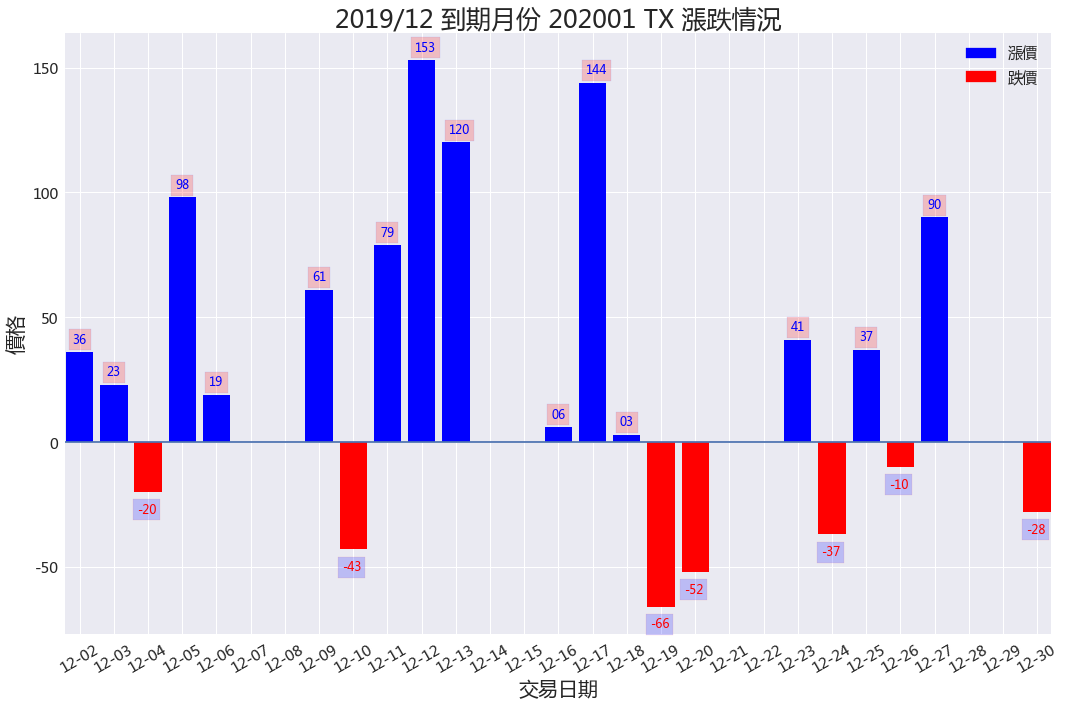

In [154]:
plt.figure(figsize=(15,10))
#顏色
ColorArray = np.zeros(df_end01.shape[0], dtype='3f4')
up_bl = np.array(df_end01["漲跌價"]) > 0
low_bl = np.array(df_end01["漲跌價"]) < 0
ColorArray[up_bl] = (0,0,1)
ColorArray[low_bl] = (1,0,0)
plt.bar(df_end01["交易日期"],df_end01["漲跌價"],color=ColorArray,width=0.8)

plt.title("2019/12 到期月份 202001 TX 漲跌情況",fontsize=25)
plt.xlabel("交易日期", fontsize=20)
plt.ylabel("價格", fontsize=20)
#漲跌分隔線
timeTuple = (list(df_end01["交易日期"])[0] + pd.Timedelta(hours=10),list(df_end01["交易日期"])[-1] - pd.Timedelta(hours=10))
plt.plot([timeTuple[0],timeTuple[1]],[0,0])

for x,y in zip(df_end01["交易日期"],df_end01["漲跌價"]):
    up_low_x = pd.Timedelta(hours=8) if y < 0 else pd.Timedelta(hours=5)
    up_low_y = 3.5 if y > 0 else -8.5
    up_low_bbox = dict(edgecolor="blue",facecolor="red",alpha=0.2) if y > 0 else \
                 dict(edgecolor="red",facecolor="blue",alpha=0.2)
    up_low_color = "blue" if y > 0 else "red"
    plt.text(x-up_low_x, y+up_low_y,str(y).zfill(2), bbox=up_low_bbox, color=up_low_color)
    
adjustDate()
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
up_lable = mpatches.Patch(color="blue",label="漲價")
low_label = mpatches.Patch(color="red",label="跌價")
plt.legend(handles=[up_lable,low_label],prop={"size":15})
plt.tight_layout()
plt.show()

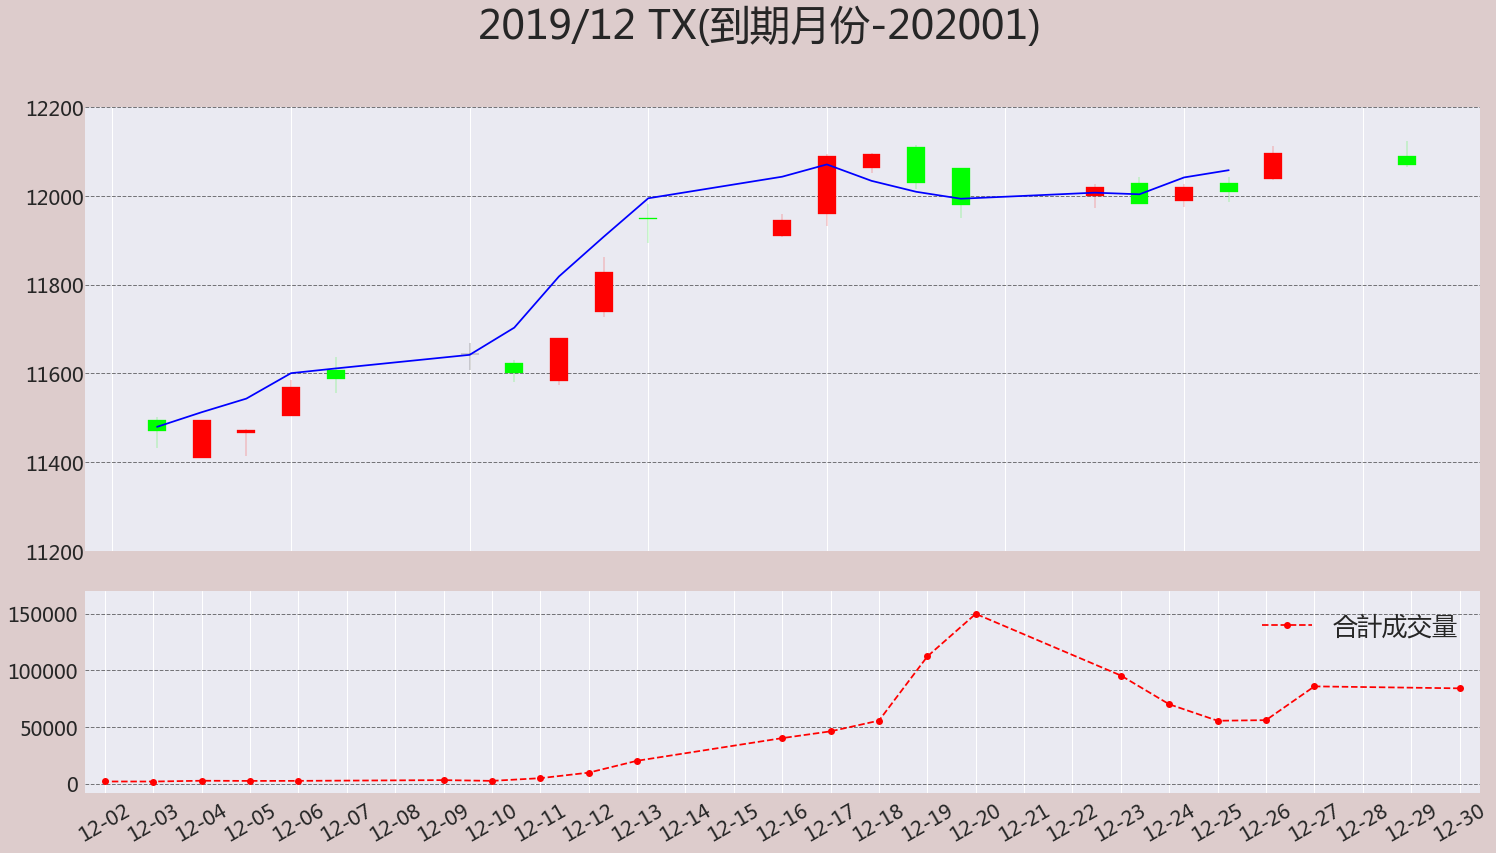

In [155]:
# plt.subplot2grid(0,0) --
# (3,1) 窗口分為3 row 1 columns
# (0,0) 從 0 row 0 columns開始畫
# rowspan=2 跨越兩個row

# 移動平均
moving = df_end01["最後成交價"].rolling(3).mean()

result = plt.figure(figsize=(25,14),facecolor="#DDCCCC")
result.tight_layout()
result.suptitle("2019/12 TX(到期月份-202001)",fontsize=40)
ax0 = plt.subplot2grid((3,1), (0, 0), rowspan=2)
ax0.tick_params(pad=1,labelsize=20)
rise = df_end01["最後成交價"] - df_end01["開盤價"] > 0
fall = df_end01["最後成交價"] - df_end01["開盤價"] < 0
fc = np.zeros(df_end01.shape[0],dtype="3f4")
fc[rise] = (1,0,0) # red
fc[fall] = (0,1,0) # green
ax0.bar(df_end01["交易日期"],df_end01["最高價"]-df_end01["最低價"],0,df_end01["最低價"],color=fc,edgecolor=fc)
ax0.bar(df_end01["交易日期"],df_end01["最後成交價"]-df_end01["開盤價"],0.4,df_end01["開盤價"],color=fc,edgecolor=fc)
ax0.plot(df_end01["交易日期"],moving,color="blue")
plt.ylim(11200,12200)
ax0.grid(axis="y",color="k",linestyle="--",alpha=0.5)


ax1 = plt.subplot2grid((3,1), (2, 0))
ax1.plot(df_end01["交易日期"],df_end01["*合計成交量"],linestyle="--",marker="o",color="red",label="合計成交量")
   
ax1.legend(prop={'size':25})
ax1.set_ylim([-8000,170000])
ax1.tick_params(labelsize=20)
ax1.grid(axis="y",color="k",linestyle="--",alpha=0.5)
adjustDate()
